In [1]:
'''
Author: Sriram Yarlagadda + George Nakhleh
Date Created: 9/12/2016
Note: Please use Python 2.7
'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats import proportion
from scipy import stats
%matplotlib inline
#os.chdir('C:\\Users\\gnakhleh\\Documents\\Loyola\\Spine Ileus') #Set location of home dir here.
#os.chdir('/Users/Sriram/Desktop/DePaul/Loyola-ILEUS-Analysis')#location in Mac
os.chdir('C:/Users/syarlag1/Desktop/Loyola-ILEUS-Analysis')

### Reading the Data

In [2]:
varLst = ['KEY','SCOLI','LOS','SHORT','LONG','ALIF','PLIF','ileus_NPOA', 'SCOLI_ILEUS','SHORT_ILEUS',\
          'LONG_ILEUS','ALIF_ILEUS','PLIF_ILEUS', 'DIED', 'MI_POA', 'MI_NPOA', 'DVT_POA', 'DVT_NPOA',\
          'Sepsis_POA', 'Sepsis_NPOA', 'PE_POA', 'PE_NPOA']
CAData = pd.read_stata('SPINE_ILEUS_CA.dta', columns=varLst)

In [3]:
CAData.describe()  #note that there are no patients with PE

,KEY,SCOLI,LOS,SHORT,LONG,ALIF,PLIF,ileus_NPOA,SCOLI_ILEUS,SHORT_ILEUS,...,PLIF_ILEUS,DIED,MI_POA,MI_NPOA,DVT_POA,DVT_NPOA,Sepsis_POA,Sepsis_NPOA,PE_POA,PE_NPOA
count,1.985570e+05,198557.000000,198553.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,...,198557.000000,198544.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.000000,198557.0,198557.0
mean,6.200873e+12,0.870642,4.831481,0.798174,0.211551,0.149327,0.106660,0.026169,0.023409,0.019073,...,0.003984,0.003752,0.000579,0.002770,0.001501,0.003616,0.002090,0.005293,0.0,0.0
std,1.699881e+08,0.336071,22.353190,0.401497,0.408499,0.355765,0.309005,0.159243,0.151016,0.136434,...,0.062903,0.068153,0.024052,0.052513,0.038685,0.059937,0.045644,0.072438,0.0,0.0
min,6.200610e+12,0.000000,-6666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,6.200713e+12,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,6.200911e+12,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,6.201012e+12,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,6.201114e+12,1.000000,358.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


### Data Preprocessing

In [4]:
np.sum(np.array(CAData < 0), 0)

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

As we can see there are only 4 negative values that need to be removed. In addition to this, we also scan for any NaNs:

In [5]:
np.sum(np.array(pd.isnull(CAData)),0)

array([ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,
        0,  0,  0,  0,  0])

There are 17 NaNs. We proceed to clean the data:

In [6]:
for feature in CAData.columns: 
    CAData = CAData[CAData[feature] >= 0]

In [7]:
CAData.shape

(198536, 22)

### Answers to Questions

#### 1) Is there higher rate of ILEUS for patients that undergo ALIF vs PLIF (as past studies have shown)?

In [8]:
CADataSub = CAData[(CAData.PLIF + CAData.ALIF) ==1]; CADataSub.shape #all such cases are removed

(43287, 22)

In [9]:
# We now look at a contingency table for both these cases
ct_PvA = pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.PLIF, CADataSub.ALIF]); ct_PvA#just the counts 
# We only need to compare based on one of the columns since PLIF == 0 would mean ALIF == 1 anyway

PLIF,0.0,1.0
ALIF,1.0,0.0
ileus_NPOA,,
0.0,23921,16990
1.0,1957,419


In [10]:
pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.PLIF, CADataSub.ALIF]).apply(lambda x: x/x.sum(), 0)

PLIF,0.0,1.0
ALIF,1.0,0.0
ileus_NPOA,,
0.0,0.924376,0.975932
1.0,0.075624,0.024068


In [11]:
#Implemented the test in R as there doesnt seem to be a reliable package in python. Here are the results:
'''
prop.test(c(1957,419),c(25878,17409),correct=FALSE)

	2-sample test for equality of proportions without
	continuity correction

data:  c(1957, 419) out of c(25878, 17409) 
X-squared = 533.26, df = 1, p-value < 2.2e-16 
alternative hypothesis: two.sided
95 percent confidence interval:
 0.04761145 0.05550070
sample estimates:
    prop 1     prop 2 
0.07562408 0.02406801 
'''
#SIGNIFICANT

'\nprop.test(c(1957,419),c(25878,17409),correct=FALSE)\n\n\t2-sample test for equality of proportions without\n\tcontinuity correction\n\ndata:  c(1957, 419) out of c(25878, 17409) \nX-squared = 533.26, df = 1, p-value < 2.2e-16 \nalternative hypothesis: two.sided\n95 percent confidence interval:\n 0.04761145 0.05550070\nsample estimates:\n    prop 1     prop 2 \n0.07562408 0.02406801 \n'

In [12]:
#Flipped so odds ratio is expressed clearly
ct_ALIF = pd.crosstab(CADataSub.ALIF, CADataSub.ileus_NPOA); ct_ALIF#just the counts 

ileus_NPOA,0.0,1.0
ALIF,,
0.0,16990,419
1.0,23921,1957


In [13]:
print "Odds ratio: ", stats.fisher_exact(ct_ALIF)[0]

Odds ratio:  3.317346608


In [14]:
ct_PLIF = pd.crosstab(CADataSub.PLIF, CADataSub.ileus_NPOA); ct_PLIF#just the counts 

ileus_NPOA,0.0,1.0
PLIF,,
0.0,23921,1957
1.0,16990,419


In [15]:
print "Odds ratio: ", stats.fisher_exact(ct_PLIF)[0]

Odds ratio:  0.30144573907


#### 2) Does length of Fusion (Long vs Short) have an impact on ILEUS?

In [16]:
CADataSub = CAData[(CAData.LONG + CAData.SHORT) ==1]; CADataSub.shape

(190922, 22)

In [17]:
ct_LvS = pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.LONG, CADataSub.SHORT]); ct_LvS#just the c

LONG,0.0,1.0
SHORT,1.0,0.0
ileus_NPOA,,
0.0,150233,35873
1.0,3465,1351


In [18]:
pd.crosstab(CADataSub.ileus_NPOA, [CADataSub.LONG, CADataSub.SHORT]).apply(lambda x: x/x.sum(),0)

LONG,0.0,1.0
SHORT,1.0,0.0
ileus_NPOA,,
0.0,0.977456,0.963706
1.0,0.022544,0.036294


In [19]:
#As before, we implemented the test in R as there doesnt seem to be a reliable package in python. Here are the results:
'''
prop.test(c(3465,1351),c(153698,37224),correct=FALSE)

	2-sample test for equality of proportions without
	continuity correction

data:  c(3465, 1351) out of c(153698, 37224)
X-squared = 230.4, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01578926 -0.01170990
sample estimates:
    prop 1     prop 2 
0.02254421 0.03629379 
'''
#SIGNIFICANT

'\nprop.test(c(3465,1351),c(153698,37224),correct=FALSE)\n\n\t2-sample test for equality of proportions without\n\tcontinuity correction\n\ndata:  c(3465, 1351) out of c(153698, 37224)\nX-squared = 230.4, df = 1, p-value < 2.2e-16\nalternative hypothesis: two.sided\n95 percent confidence interval:\n -0.01578926 -0.01170990\nsample estimates:\n    prop 1     prop 2 \n0.02254421 0.03629379 \n'

In [20]:
ct_LONG = pd.crosstab(CADataSub.ileus_NPOA, CADataSub.LONG); ct_LONG

LONG,0.0,1.0
ileus_NPOA,,
0.0,150233,35873
1.0,3465,1351


In [21]:
print "Odds ratio: ", stats.fisher_exact(ct_LONG)[0]

Odds ratio:  1.63286301535


In [22]:
ct_SHORT = pd.crosstab(CADataSub.ileus_NPOA, CADataSub.SHORT); ct_SHORT

SHORT,0.0,1.0
ileus_NPOA,,
0.0,35873,150233
1.0,1351,3465


In [23]:
print "Odds ratio: ", stats.fisher_exact(ct_SHORT)[0]

Odds ratio:  0.612421244527


#### 3) Does ILEUS affect LOS?

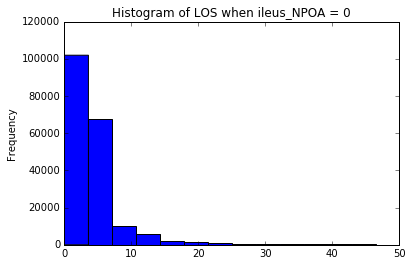

In [24]:
CAData[CAData.ileus_NPOA == 0.].LOS.plot('hist', xlim=(0,50), bins = 100)
plt.title('Histogram of LOS when ileus_NPOA = 0'); plt.show()

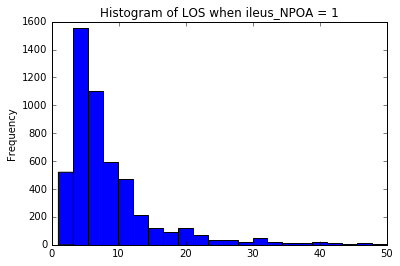

In [25]:
CAData[CAData.ileus_NPOA == 1.].LOS.plot('hist', xlim=(0,50), bins = 100) #zooming in to avoid outliers
plt.title('Histogram of LOS when ileus_NPOA = 1'); plt.show()

In [26]:
group1_LOS =  CAData[CAData.ileus_NPOA == 0.].LOS
group2_LOS =  CAData[CAData.ileus_NPOA == 1.].LOS
print "The median LOS of ileus_NPOA = 0 is ", group1_LOS.median()
print "The median LOS of ileus_NPOA = 1 is ", group2_LOS.median()

The median LOS of ileus_NPOA = 0 is  3.0
The median LOS of ileus_NPOA = 1 is  6.0


In [27]:
group1_LOS =  CAData[CAData.ileus_NPOA == 0.].LOS
group2_LOS =  CAData[CAData.ileus_NPOA == 1.].LOS
print "The mean LOS of ileus_NPOA = 0 is ", group1_LOS.mean()
print "The mean LOS of ileus_NPOA = 1 is ", group2_LOS.mean()

The mean LOS of ileus_NPOA = 0 is  4.7678867907
The mean LOS of ileus_NPOA = 1 is  9.73878729548


In [28]:
#Are hospital stays for those w/ ilesuses longer?
#Using the Wilcox rank-sum statistic (link: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html)
z_stat, p_val = stats.ranksums(group1_LOS, group2_LOS)
print "p-value: ", p_val  #Test is significant --> The LOS of the ILEUS group is higher than the non-ILEUS group

p-value:  0.0


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


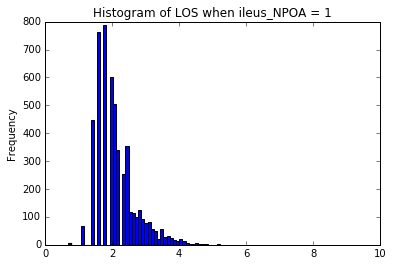

In [29]:
#Log transform the data and perform a t-test
CAData_ileusLOS = CAData[['ileus_NPOA', 'LOS']]
CAData_ileusLOS['LOS_log'] = np.log(CAData_ileusLOS['LOS']+1)

CAData_ileusLOS[CAData_ileusLOS.ileus_NPOA == 1.].LOS_log.plot('hist', xlim=(0,10), bins = 50) #zooming in to avoid outliers
plt.title('Histogram of LOS when ileus_NPOA = 1'); plt.show()

In [30]:
#Do a t-test

from scipy.stats import ttest_ind

group1_LOS_log = np.array(CAData_ileusLOS[CAData_ileusLOS.ileus_NPOA == 0.].LOS_log)
group2_LOS_log = np.array(CAData_ileusLOS[CAData_ileusLOS.ileus_NPOA == 1.].LOS_log)

stat, pvalue = ttest_ind(group1_LOS_log, group2_LOS_log)

print("P-value: %.100f" % pvalue)

P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [31]:
stats.ttest_ind(group1_LOS_log, group2_LOS_log)

Ttest_indResult(statistic=-71.455175795502726, pvalue=0.0)

In [32]:
CAData_ileusLOS.head(10)

,ileus_NPOA,LOS,LOS_log
0,0.0,15.0,2.772589
1,0.0,16.0,2.833213
2,0.0,18.0,2.944439
3,0.0,8.0,2.197225
4,0.0,44.0,3.806662
5,0.0,10.0,2.397895
6,0.0,6.0,1.945910
7,0.0,6.0,1.945910
8,0.0,26.0,3.295837
9,0.0,11.0,2.484907


#### 4) Does ILEUS affect death?

In [33]:
ct_DIED = pd.crosstab(CAData.DIED, CAData.ileus_NPOA); ct_DIED#just the counts

ileus_NPOA,0.0,1.0
DIED,,
0.0,192640,5137
1.0,701,58


In [34]:
pd.crosstab(CAData.DIED, CAData.ileus_NPOA).apply(lambda x: x/x.sum(),0)

ileus_NPOA,0.0,1.0
DIED,,
0.0,0.996374,0.988835
1.0,0.003626,0.011165


In [35]:
#As before, we implemented the test in R as there doesnt seem to be a reliable package in python. Here are the results:
'''
prop.test(c(701,58),c(193341,5195),correct=FALSE)

	2-sample test for equality of proportions without
	continuity correction

data:  c(701, 58) out of c(193341, 5195)
X-squared = 75.499, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.010408583 -0.004669143
sample estimates:
     prop 1      prop 2 
0.003625718 0.011164581 
'''
#SIGNIFICANT

'\nprop.test(c(701,58),c(193341,5195),correct=FALSE)\n\n\t2-sample test for equality of proportions without\n\tcontinuity correction\n\ndata:  c(701, 58) out of c(193341, 5195)\nX-squared = 75.499, df = 1, p-value < 2.2e-16\nalternative hypothesis: two.sided\n95 percent confidence interval:\n -0.010408583 -0.004669143\nsample estimates:\n     prop 1      prop 2 \n0.003625718 0.011164581 \n'

In [36]:
print "Odds ratio: ", stats.fisher_exact(ct_DIED)[0]

Odds ratio:  3.10275067987


#### 5) Does ILEUS affect DVT?

In [37]:
ct_dvt = pd.crosstab(CAData.DVT_NPOA, CAData.ileus_NPOA); ct_dvt

ileus_NPOA,0.0,1.0
DVT_NPOA,,
0.0,192721,5098
1.0,620,97


In [38]:
#Look at proportions: did people who developed ileuses also develop DVT?
ct_dvt.apply(lambda x: x/x.sum(), 0)

ileus_NPOA,0.0,1.0
DVT_NPOA,,
0.0,0.996793,0.981328
1.0,0.003207,0.018672


In [39]:
#As before, we implemented the test in R as there doesnt seem to be a reliable package in python. Here are the results:
'''
prop.test(c(620,97),c(193341, 5292),correct=FALSE)

	2-sample test for equality of proportions without
	continuity correction

data:  c(620, 97) out of c(193341, 5292)
X-squared = 327.54, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01874563 -0.01149994
sample estimates:
     prop 1      prop 2 
0.003206769 0.018329554 
'''
#SIGNIFICANT

'\nprop.test(c(620,97),c(193341, 5292),correct=FALSE)\n\n\t2-sample test for equality of proportions without\n\tcontinuity correction\n\ndata:  c(620, 97) out of c(193341, 5292)\nX-squared = 327.54, df = 1, p-value < 2.2e-16\nalternative hypothesis: two.sided\n95 percent confidence interval:\n -0.01874563 -0.01149994\nsample estimates:\n     prop 1      prop 2 \n0.003206769 0.018329554 \n'

In [40]:
print "Odds ratio: ", stats.fisher_exact(ct_dvt)[0]

Odds ratio:  5.91438040218


#### 6) Does ILEUS affect MI (heart attack)?

In [41]:
ct_mi = pd.crosstab(CAData.MI_NPOA, CAData.ileus_NPOA); ct_mi

ileus_NPOA,0.0,1.0
MI_NPOA,,
0.0,192823,5164
1.0,518,31


In [42]:
ct_mi.apply(lambda x: x/x.sum(), 0)

ileus_NPOA,0.0,1.0
MI_NPOA,,
0.0,0.997321,0.994033
1.0,0.002679,0.005967


In [43]:
#As before, we implemented the test in R as there doesnt seem to be a reliable package in python. Here are the results:
'''
prop.test(c(518,31),c(193341, 5195),correct=FALSE)

	2-sample test for equality of proportions without
	continuity correction

data:  c(518, 31) out of c(193341, 5195)
X-squared = 19.835, df = 1, p-value = 8.444e-06
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.005395032 -0.001181112
sample estimates:
     prop 1      prop 2 
0.002679204 0.005967276 
'''
# IMPORTANT: Since the difference is so small, eventhough, we have a significant result, it is better to be conservative
# and mention that this result is not useful


'\nprop.test(c(518,31),c(193341, 5195),correct=FALSE)\n\n\t2-sample test for equality of proportions without\n\tcontinuity correction\n\ndata:  c(518, 31) out of c(193341, 5195)\nX-squared = 19.835, df = 1, p-value = 8.444e-06\nalternative hypothesis: two.sided\n95 percent confidence interval:\n -0.005395032 -0.001181112\nsample estimates:\n     prop 1      prop 2 \n0.002679204 0.005967276 \n'

In [44]:
print "Odds ratio: ", stats.fisher_exact(ct_mi)[0]

Odds ratio:  2.234624397


#### 7) Does ILEUS affect sepsis?

In [45]:
ct_sepsis = pd.crosstab(CAData.Sepsis_NPOA, CAData.ileus_NPOA); ct_sepsis

ileus_NPOA,0.0,1.0
Sepsis_NPOA,,
0.0,192435,5054
1.0,906,141


In [46]:
ct_sepsis.apply(lambda x: x/x.sum(), 0)

ileus_NPOA,0.0,1.0
Sepsis_NPOA,,
0.0,0.995314,0.972859
1.0,0.004686,0.027141


In [47]:
#As before, we implemented the test in R as there doesnt seem to be a reliable package in python. Here are the results:
'''
prop.test(c(906,141),c(193341, 5195),correct=FALSE)

	2-sample test for equality of proportions without
	continuity correction

data:  c(906, 141) out of c(193341, 5195)
X-squared = 486.3, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.02688466 -0.01802626
sample estimates:
     prop 1      prop 2 
0.004686021 0.027141482 
'''
#SIGNIFICANT

'\nprop.test(c(906,141),c(193341, 5195),correct=FALSE)\n\n\t2-sample test for equality of proportions without\n\tcontinuity correction\n\ndata:  c(906, 141) out of c(193341, 5195)\nX-squared = 486.3, df = 1, p-value < 2.2e-16\nalternative hypothesis: two.sided\n95 percent confidence interval:\n -0.02688466 -0.01802626\nsample estimates:\n     prop 1      prop 2 \n0.004686021 0.027141482 \n'

In [48]:
print "Odds ratio: ", stats.fisher_exact(ct_sepsis)[0]

Odds ratio:  5.92570110358
